In [1]:
from settings import *

random_rho0s: setting seed=48380


In [2]:
qubits = TriangularLayoutA(m=m, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

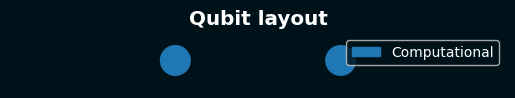

In [3]:
qubits.show_layout()

In [4]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, n_grad=10, max_count=500)

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=78354


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


-----
        Grad calculation time: 
        170.54430150985718 
        Armijo calculation time: 
        13.125051259994507 
        Total grad descend time: 
        3:3.67


In [5]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [6]:
theta_opt

array([1.08393929, 0.80386644, 0.89219982, 0.93092301, 0.94040187,
       1.15388247, 0.92124724, 0.93953129, 1.10205575, 1.02687427,
       0.702599  , 0.94858924, 1.24521043, 0.94388929, 1.03806388,
       1.18478414, 0.81554416, 1.2449251 , 1.04536759, 0.82560795,
       1.03684041, 1.02882822, 0.84045345, 0.73608172, 0.95985836,
       1.00346374, 1.18314707, 1.20328132, 0.9731801 , 1.10030647,
       1.00841638, 0.79416091, 1.02742782, 1.11180658, 1.00056655,
       1.01832142, 1.06277796, 0.68014311, 1.1181156 , 1.13161694,
       0.96092561, 0.88342041, 1.14451269, 1.15554809, 1.01756861,
       0.87978593, 0.9776853 , 1.16713182, 1.19588423, 0.92263234,
       1.13643187, 0.88505476, 0.75599841, 1.028333  , 0.91800509,
       1.10674221, 0.99815278, 0.90351634, 0.92140519, 1.31587209,
       1.06736598, 0.98125072, 0.87634337, 1.1039716 , 0.79295189,
       0.97109915, 0.79644277, 0.96245581, 1.22518411, 0.84816446])

In [7]:
from q_channel_approx.unitary_circuits import unitary_circuit_fac

In [8]:
ham = circuit(theta_opt)
import qutip as qt
qt.Qobj(ham)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[-0.49603473-0.04744469j  0.5865099 -0.09418191j -0.54870556-0.16317152j
   0.15062671-0.22009839j]
 [ 0.67000255+0.12132946j -0.12939064-0.12523893j -0.57474649-0.23720479j
   0.34220975+0.01555196j]
 [-0.52456957-0.03840413j -0.67334293-0.08932738j -0.15552809-0.03934738j
   0.45741594+0.16436322j]
 [ 0.0078327 -0.10660591j -0.2332753 -0.31451825j  0.21791943-0.46094636j
  -0.1001871 -0.75182235j]]

In [9]:
from q_channel_approx.physics_defns import create_hamiltonian
create_hamiltonian(system)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.2 0.3 0. ]
 [0.2 0.  0.  0.3]
 [0.3 0.  0.  0.2]
 [0.  0.3 0.2 0.2]]

In [10]:
np.sum(ham.dot(ham.conj().T) - np.identity(2**m) )# check if unitary

(-4.829470157119431e-15+0j)

rho_rand_haar: seed=73071


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

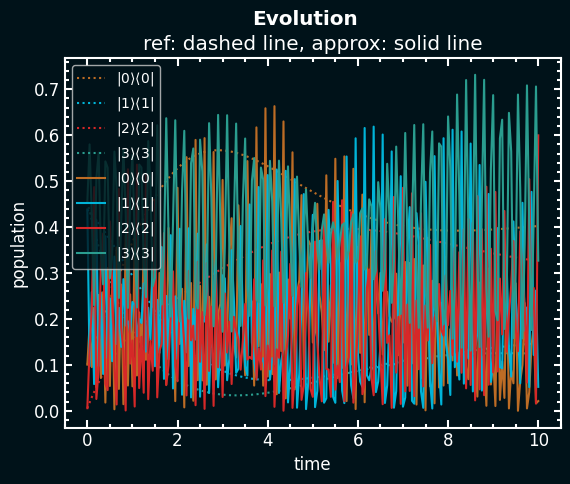

In [11]:
rho0 = rho_rand_haar(m)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(200, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.05, N=200, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

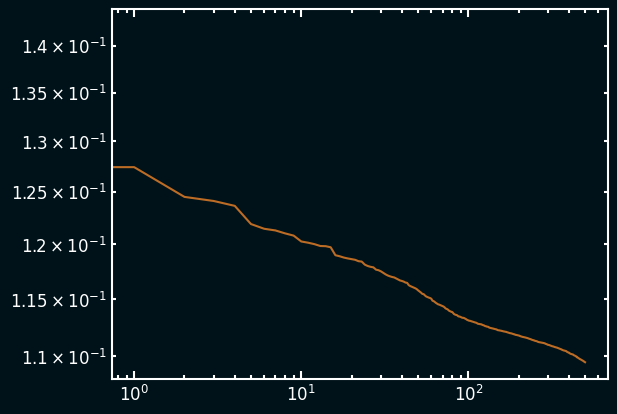

In [12]:
plt.loglog(errors)